In [63]:
# Import Libraries
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
plt.style.use('ggplot')

from matplotlib.pyplot import figure

%matplotlib inline # plots/graphs will be displayed just below the cell

matplotlib.rcParams['figure.figsize'] = (12,8) # adjust the configuration of the plots to be created

import warnings
warnings.simplefilter("ignore")

UsageError: unrecognized arguments: # plots/graphs will be displayed just below the cell


In [21]:
# read in dataset
# go the document on your system, right click on to go to properties. Then copy the link on location, add 'r' 
# of the link,add the name of the data as well as as format it was saved.For our data, it was saved in CSV file.

df = pd.read_csv(r'C:\Users\oshoi\Desktop\datasets\movies.csv')

# Chech the first 5 rows

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [22]:
# Check for missing data 1st method
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [23]:
# Check for missing data 2nd method

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [25]:
# Lets fill all missing data using the median

df = df.fillna(df.median())

C:\Users\oshoi\AppData\Local\Temp\ipykernel_10952\210099949.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


In [26]:
df.isnull().sum()

name         0
rating      77
genre        0
year         0
released     2
score        0
votes        0
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      0
dtype: int64

In [28]:
# Drop missing values
df.dropna(inplace=True)

In [29]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7576 entries, 0 to 7661
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7576 non-null   object 
 1   rating    7576 non-null   object 
 2   genre     7576 non-null   object 
 3   year      7576 non-null   int64  
 4   released  7576 non-null   object 
 5   score     7576 non-null   float64
 6   votes     7576 non-null   float64
 7   director  7576 non-null   object 
 8   writer    7576 non-null   object 
 9   star      7576 non-null   object 
 10  country   7576 non-null   object 
 11  budget    7576 non-null   float64
 12  gross     7576 non-null   float64
 13  company   7576 non-null   object 
 14  runtime   7576 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 947.0+ KB


In [32]:
# Check for number of rows and columns
df.shape

(7576, 15)

In [38]:
# Change data type of columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [98]:
df.head()

name  rating  genre  year  released  score    votes  director  writer  \
5445   527       5      0  2009       688    7.8  1100000      1137    1757   
7445   529       5      0  2019       180    8.4   903000       160     730   
3045  6813       5      6  1997       696    7.8  1100000      1137    1757   
6663  5077       5      0  2015       690    7.8   876000      1107    2519   
7244   530       5      0  2018       189    8.4   897000       160     730   

      star  country     budget       gross  company  runtime  yearCorrect  
5445  2284       55  237000000  2847246203     2209      162           10  
7445  2193       55  356000000  2797501328     1572      181            8  
3045  1560       55  200000000  2201647264     2209      194           10  
6663   508       55  245000000  2069521700     1506      138           10  
7244  2193       55  321000000  2048359754     1572      149            8

In [41]:
# Create correct Year Column.Do this when there is inconsistence between 'year' and 'released'

df['yearCorrect'] = df['released'].astype(str).str[:4]

df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7653                                      The Quarry          R      Crime   
7656                                           Tulsa      PG-13     Comedy   
7658                       Black Wall Street Burning          R      Drama   
7659                                       I Am Fear  Not Rated     Horror   
7661                                Love by Drowning          R      Drama   

      year                          released  score    votes  \
0     1980     June 13, 1980 (United States)    8.4   927000   
1     1980      July 2, 1980 (United States)    5.8    65000   
2     1980     June 20, 1980 (United States)    8.7  1200000   
3     1980      July 2, 1980 (United States)    7.7   221000   
4     1980     July 25, 1980 (United States)    7.3   108000   
...    ...                               ...    ...      ...   
7653  2020           April 17, 2020 (Mexico)    5.4     2400   
7656  2020      June 3, 2020 (United States)    5.0      294   
7658  2020  February 7, 2020 (United States)    6.6       35   
7659  2020     March 3, 2020 (United States)    3.4      447   
7661  2020  November 6, 2020 (United States)    6.5    33000   

               director                   writer            star  \
0       Stanley Kubrick             Stephen King  Jack Nicholson   
1        Randal Kleiser  Henry De Vere Stacpoole  Brooke Shields   
2        Irvin Kershner           Leigh Brackett     Mark Hamill   
3          Jim Abrahams             Jim Abrahams     Robert Hays   
4          Harold Ramis       Brian Doyle-Murray     Chevy Chase   
...                 ...                      ...             ...   
7653        Scott Teems              Scott Teems    Shea Whigham   
7656        Scott Pryor              Scott Pryor     Scott Pryor   
7658       Marcus Brown          Dekoven Riggins     Dan Belcher   
7659      Kevin Shulman            Kevin Shulman  Kristina Klebe   
7661  Justin Kreinbrink            C.E. Poverman    Nicky Whelan   

             country    budget      gross              company  runtime  \
0     United Kingdom  19000000   46998772         Warner Bros.      146   
1      United States   4500000   58853106    Columbia Pictures      104   
2      United States  18000000  538375067            Lucasfilm      124   
3      United States   3500000   83453539   Paramount Pictures       88   
4      United States   6000000   39846344       Orion Pictures       98   
...              ...       ...        ...                  ...      ...   
7653   United States  20500000       3661     Prowess Pictures       98   
7656   United States  20500000     413378  Pryor Entertainment      120   
7658   United States      5000   20205757         Notis Studio       78   
7659   United States  20500000      13266        Roxwell Films       87   
7661   United States   1000000   20205757       Dow Jazz Films      121   

     yearCorrect  
0           June  
1           July  
2           June  
3           July  
4           July  
...          ...  
7653        Apri  
7656        June  
7658        Febr  
7659        Marc  
7661        Nove  

[7576 rows x 16 columns]

In [65]:
df = df.sort_values(by=['gross'], inplace = False, ascending = False)

In [66]:
# when you want to see the entire dataset without breaks in the middle

pd.set_option('display.max_rows', None)

In [99]:
df.head()

name  rating  genre  year  released  score    votes  director  writer  \
5445   527       5      0  2009       688    7.8  1100000      1137    1757   
7445   529       5      0  2019       180    8.4   903000       160     730   
3045  6813       5      6  1997       696    7.8  1100000      1137    1757   
6663  5077       5      0  2015       690    7.8   876000      1107    2519   
7244   530       5      0  2018       189    8.4   897000       160     730   

      star  country     budget       gross  company  runtime  yearCorrect  
5445  2284       55  237000000  2847246203     2209      162           10  
7445  2193       55  356000000  2797501328     1572      181            8  
3045  1560       55  200000000  2201647264     2209      194           10  
6663   508       55  245000000  2069521700     1506      138           10  
7244  2193       55  321000000  2048359754     1572      149            8

In [68]:
# Check duplicates

# df['company'].sort_values(ascending=False)


In [69]:
# drop duplicates

# df['company'].drop_duplicates().sort_values(ascending=False)

In [70]:
# drop duplicates in the entire dataframe

#df.drop_duplicates()

**Lets try to find other columns that are most correlated to the gross revenue to help the analysis.**

* Budget may be highly correlated to gross reenue from my guess
* company may have high correlation.This is a guess.

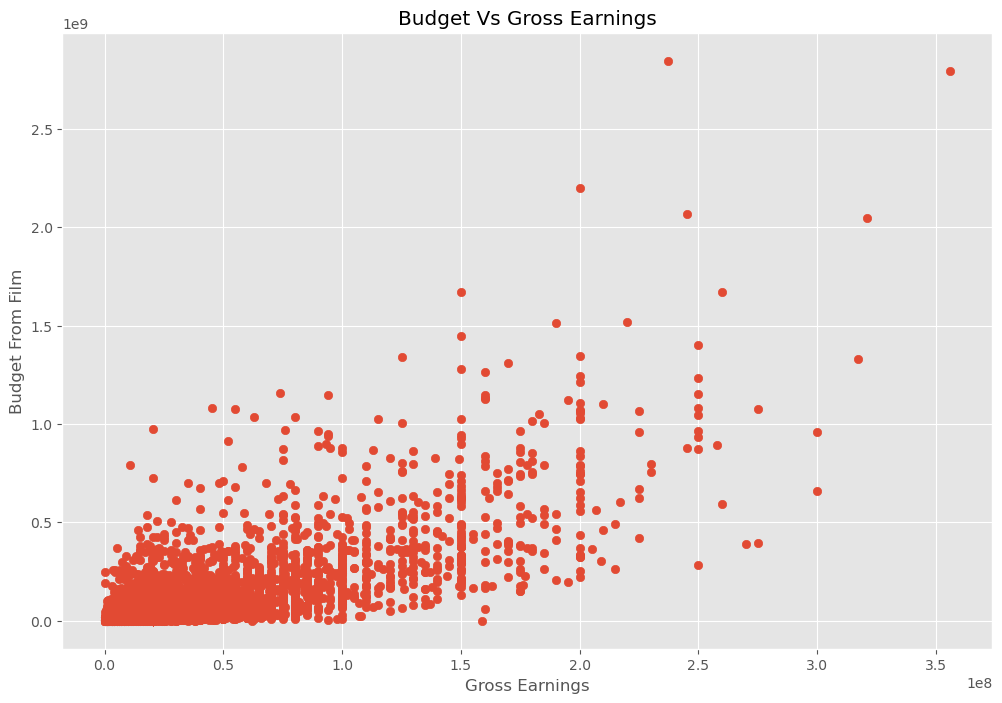

In [74]:
# Scatter plot with budget vs gross


plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget Vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget From Film')

plt.show()

In [71]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score    votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime yearCorrect  
5445  2847246203  Twentieth Century Fox      162        Dece  
7445  2797501328         Marvel Studios      181        Apri  
3045  2201647264  Twentieth Century Fox      194        Dece  
6663  2069521700              Lucasfilm      138        Dece  
7244  2048359754         Marvel Studios      149        Apri

<AxesSubplot:xlabel='budget', ylabel='gross'>

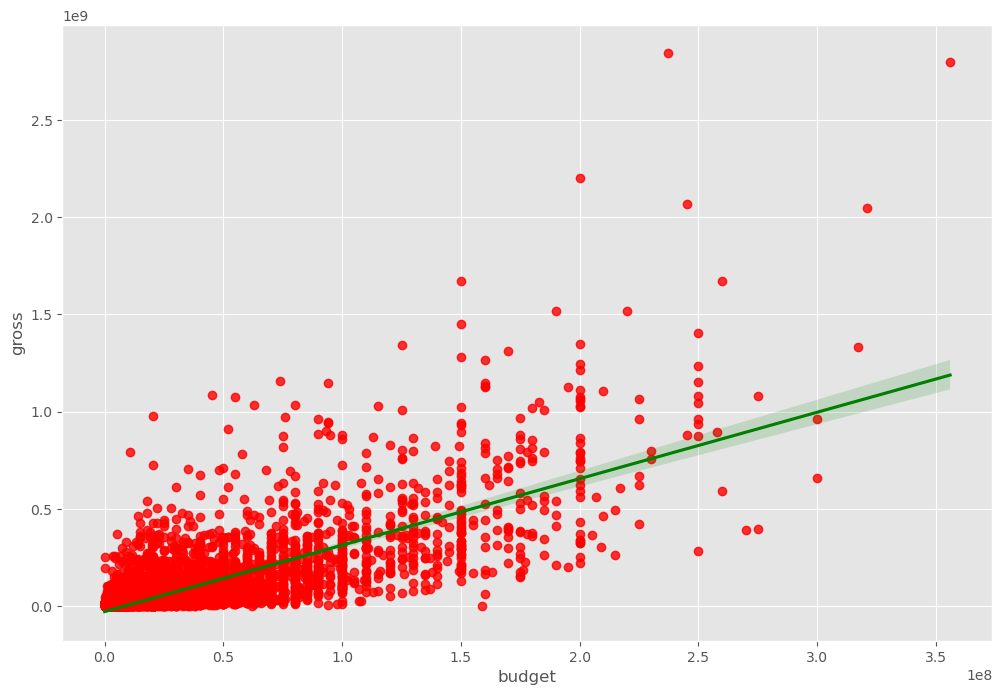

In [78]:
# plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross',data=df,scatter_kws={"color":"red"}, line_kws={"color":"green"})

In [80]:
# what then is the actual correlation
# the corr() only work on the numerical columns
# you can use pearson, kendall, spearman

df.corr(method='pearson')

year     score     votes    budget     gross   runtime
year     1.000000  0.102180  0.226709  0.295868  0.261960  0.120786
score    0.102180  1.000000  0.411929  0.062478  0.187536  0.400562
votes    0.226709  0.411929  1.000000  0.460066  0.632341  0.309324
budget   0.295868  0.062478  0.460066  1.000000  0.746358  0.273790
gross    0.261960  0.187536  0.632341  0.746358  1.000000  0.244161
runtime  0.120786  0.400562  0.309324  0.273790  0.244161  1.000000

In [81]:
# high correlation between budget and gross follow my initial guess.

<function matplotlib.pyplot.show(close=None, block=None)>

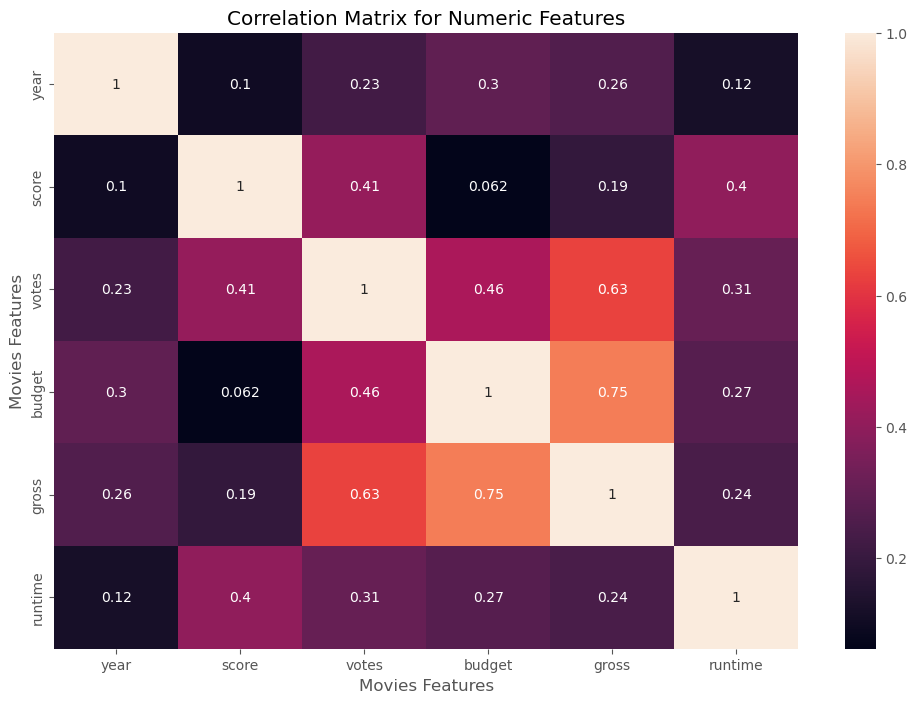

In [86]:
# Lets show this correlation on a heatmap using seaborn
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)


plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movies Features')
plt.ylabel('Movies Features')


plt.show

In [87]:
# Let's check company which is not numeric.

# we can make this colum numeric using their unique identifier

df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score    votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime yearCorrect  
5445  2847246203  Twentieth Century Fox      162        Dece  
7445  2797501328         Marvel Studios      181        Apri  
3045  2201647264  Twentieth Century Fox      194        Dece  
6663  2069521700              Lucasfilm      138        Dece  
7244  2048359754         Marvel Studios      149        Apri

In [90]:
# Treating categorical variables

df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes


df_numerized
        

name  rating  genre  year  released  score    votes  director  writer  \
5445   527       5      0  2009       688    7.8  1100000      1137    1757   
7445   529       5      0  2019       180    8.4   903000       160     730   
3045  6813       5      6  1997       696    7.8  1100000      1137    1757   
6663  5077       5      0  2015       690    7.8   876000      1107    2519   
7244   530       5      0  2018       189    8.4   897000       160     730   
7480  6116       4      2  2019      1468    6.9   222000      1433    1896   
6653  2939       5      0  2015      1684    7.0   593000       507    3523   
6043  5429       5      0  2012      2444    8.0  1300000      1494    2287   
6646  2124       5      0  2015       217    7.1   370000      1170     694   
7494  2110       4      2  2019      2644    6.8   148000       425    1927   
6644   528       5      0  2015      2209    7.3   777000      1494    2287   
7247   782       5      0  2018       945    7.3   661000      2418    3748   
5845  2383       5      1  2011      1425    8.1   790000       666    3998   
7075  5078       5      0  2017       654    7.0   581000      2247    3474   
7271  2940       5      0  2018      1779    6.2   277000      1103    1075   
6262  2109       4      2  2013      2683    7.4   585000       425    1927   
7072   650       4      7  2017      1999    7.1   283000       246    3946   
7281  2733       4      2  2018      1709    7.6   263000       299     481   
7055  5757       5      0  2017        60    6.6   214000       820    1412   
6244  2795       5      0  2013      2422    7.1   779000      2502    1156   
6688  3580       4      2  2015      1375    6.4   218000      1613     524   
6846  1045       5      0  2016      2460    7.8   694000       160     730   
7250   468       5      0  2018       740    6.9   404000      1170     974   
4245  6143       5      0  2003       672    8.9  1700000      2158    1724   
7458  5018       5      0  2019      1481    7.5   359000      1441     692   
7456  1050       5      0  2019      2187    6.8   478000       145     249   
5878  6885       5      0  2011      1849    6.2   390000      1856    1219   
6059  4885       5      0  2012      2771    7.7   642000      2437    3084   
6494  6884       5      0  2014      1828    5.6   302000      1856    1219   
2448  6116       1      2  1994      1791    8.5   970000      2377    1681   
6047  5651       5      0  2012      1490    8.4  1600000       475    2239   
7463  5074       5      0  2019       723    6.5   394000      1107     702   
7450  2900       6      5  2019      3022    8.4  1000000      2721    4193   
7488  6866       1      2  2019      1767    7.7   217000      1486    2133   
5685  6865       1      2  2010      1732    8.2   776000      1651    2133   
4852  4199       5      0  2006      1625    7.3   668000       979    4093   
6869  4555       5      0  2016       665    7.8   572000       896     705   
7481   286       4      1  2019      2367    6.9   239000      1014    2053   
5860  4202       5      0  2011      2324    6.6   492000      2303    4093   
7140  1537       4      2  2017      1875    6.3   119000      1613     745   
2245  2937       5      0  1993      1669    8.1   894000      2615    2893   
6908  1958       4      2  2016      1724    7.3   250000       122     211   
3451  5071       4      0  1999      2292    6.5   748000       947    1453   
5667   296       4      1  2010      2158    6.4   392000      2699    2575   
6863  7414       4      2  2016      2151    8.0   450000       357     566   
6045  5924       5      1  2012       644    7.8   773000      2158    1341   
3843  2388       4      1  2001      2563    7.6   685000       428    1720   
5243  5650       5      0  2008      1456    9.0  2400000       475    2239   
5652  2382       5      1  2010      2590    7.7   495000       666    3998   
6311  1536       4      2  2013      1579    7.3   37700

<function matplotlib.pyplot.show(close=None, block=None)>

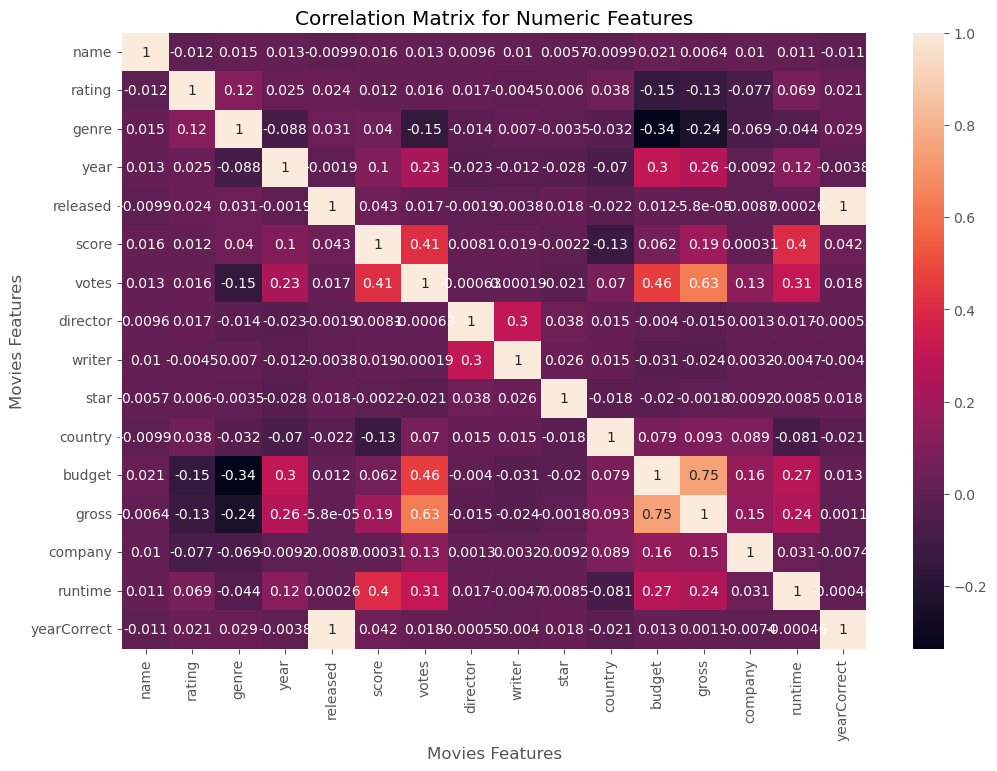

In [91]:
# plot the heatmap again using the new dataframe after treatment of categorical variables

correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)


plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movies Features')
plt.ylabel('Movies Features')


plt.show

In [92]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name         1.000000 -0.011944  0.015250  0.013483 -0.009936  0.016157   
rating      -0.011944  1.000000  0.117657  0.025120  0.024450  0.011573   
genre        0.015250  0.117657  1.000000 -0.088103  0.030843  0.040295   
year         0.013483  0.025120 -0.088103  1.000000 -0.001890  0.102180   
released    -0.009936  0.024450  0.030843 -0.001890  1.000000  0.043242   
score        0.016157  0.011573  0.040295  0.102180  0.043242  1.000000   
votes        0.013182  0.016061 -0.148381  0.226709  0.016821  0.411929   
director     0.009605  0.017211 -0.013502 -0.022740 -0.001867  0.008075   
writer       0.010271 -0.004538  0.006956 -0.012450 -0.003831  0.018867   
star         0.005666  0.005972 -0.003450 -0.027507  0.018129 -0.002186   
country     -0.009942  0.037765 -0.031503 -0.070084 -0.022073 -0.130138   
budget       0.021380 -0.146433 -0.335563  0.295868  0.011931  0.062478   
gross        0.006376 -0.129114 -0.240304  0.261960 -0.000058  0.187536   
company      0.010085 -0.076860 -0.068755 -0.009181 -0.008693  0.000313   
runtime      0.011127  0.069156 -0.044499  0.120786  0.000258  0.400562   
yearCorrect -0.011119  0.021267  0.028680 -0.003753  0.995372  0.041939   

                votes  director    writer      star   country    budget  \
name         0.013182  0.009605  0.010271  0.005666 -0.009942  0.021380   
rating       0.016061  0.017211 -0.004538  0.005972  0.037765 -0.146433   
genre       -0.148381 -0.013502  0.006956 -0.003450 -0.031503 -0.335563   
year         0.226709 -0.022740 -0.012450 -0.027507 -0.070084  0.295868   
released     0.016821 -0.001867 -0.003831  0.018129 -0.022073  0.011931   
score        0.411929  0.008075  0.018867 -0.002186 -0.130138  0.062478   
votes        1.000000 -0.000629  0.000191 -0.021007  0.069544  0.460066   
director    -0.000629  1.000000  0.297418  0.037564  0.015242 -0.003975   
writer       0.000191  0.297418  1.000000  0.026462  0.014936 -0.031215   
star        -0.021007  0.037564  0.026462  1.000000 -0.017577 -0.019799   
country      0.069544  0.015242  0.014936 -0.017577  1.000000  0.079446   
budget       0.460066 -0.003975 -0.031215 -0.019799  0.079446  1.000000   
gross        0.632341 -0.014800 -0.023779 -0.001765  0.093205  0.746358   
company      0.129612  0.001328  0.003174  0.009243  0.088941  0.164448   
runtime      0.309324  0.017403 -0.004686  0.008549 -0.081427  0.273790   
yearCorrect  0.017805 -0.000553 -0.004036  0.018024 -0.020541  0.013061   

                gross   company   runtime  yearCorrect  
name         0.006376  0.010085  0.011127    -0.011119  
rating      -0.129114 -0.076860  0.069156     0.021267  
genre       -0.240304 -0.068755 -0.044499     0.028680  
year         0.261960 -0.009181  0.120786    -0.003753  
released    -0.000058 -0.008693  0.000258     0.995372  
score        0.187536  0.000313  0.400562     0.041939  
votes        0.632341  0.129612  0.309324     0.017805  
director    -0.014800  0.001328  0.017403    -0.000553  
writer      -0.023779  0.003174 -0.004686    -0.004036  
star        -0.001765  0.009243  0.008549     0.018024  
country      0.093205  0.088941 -0.081427    -0.020541  
budget       0.746358  0.164448  0.273790     0.013061  
gross        1.000000  0.154433  0.244161     0.001115  
company      0.154433  1.000000  0.030854    -0.007374  
runtime      0.244161  0.030854  1.000000    -0.000457  
yearCorrect  0.001115 -0.007374 -0.000457     1.000000

In [94]:
# Unstacking help us understand how each variable correlate with every other variable

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.011944
             genre          0.015250
             year           0.013483
             released      -0.009936
             score          0.016157
             votes          0.013182
             director       0.009605
             writer         0.010271
             star           0.005666
             country       -0.009942
             budget         0.021380
             gross          0.006376
             company        0.010085
             runtime        0.011127
             yearCorrect   -0.011119
rating       name          -0.011944
             rating         1.000000
             genre          0.117657
             year           0.025120
             released       0.024450
             score          0.011573
             votes          0.016061
             director       0.017211
             writer        -0.004538
             star           0.005972
             country        0.037765
 

In [95]:
# sort the pairs

sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.335563
budget       genre         -0.335563
genre        gross         -0.240304
gross        genre         -0.240304
votes        genre         -0.148381
genre        votes         -0.148381
rating       budget        -0.146433
budget       rating        -0.146433
country      score         -0.130138
score        country       -0.130138
rating       gross         -0.129114
gross        rating        -0.129114
year         genre         -0.088103
genre        year          -0.088103
runtime      country       -0.081427
country      runtime       -0.081427
company      rating        -0.076860
rating       company       -0.076860
country      year          -0.070084
year         country       -0.070084
genre        company       -0.068755
company      genre         -0.068755
genre        runtime       -0.044499
runtime      genre         -0.044499
genre        country       -0.031503
country      genre         -0.031503
writer       budget        -0.031215
b

In [96]:
# define certain variable named high_corr

high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr


gross        votes          0.632341
votes        gross          0.632341
gross        budget         0.746358
budget       gross          0.746358
released     yearCorrect    0.995372
yearCorrect  released       0.995372
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearCorrect  yearCorrect    1.000000
dtype: float64

In [97]:
# votes and budget have the highest corelation to gross earnings

# Company has low correlation which prove my initial guess wrong.